In [14]:
import pandas as pd

### 데이터 불러오기

In [15]:
df = pd.read_excel('./data/kto_total.xlsx')
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


### 폰트 설정하기

In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

### OS에 따른 폰트 설정

In [13]:
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')

### 그래프 생성

In [21]:
df_filter = df[df['국적'] == '중국']
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1


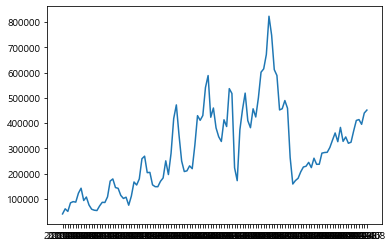

In [35]:
# 기준년월 별 관광객 변화 추이
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

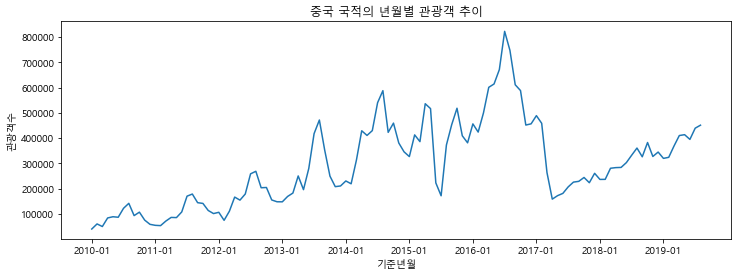

In [46]:
# 그래프 크기 조정
plt.figure(figsize= (12,4)) # 너비, 높이 지정
plt.plot(df_filter['기준년월'], df_filter['관광'])
# 그래프 전체 제목 넣기
plt.title('중국국적의 년월별 관광객 추이')
# x축, y축 이름달기
plt.xlabel('기준년월')
plt.ylabel('관광객수')
# x축 범위 지정
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01']) # 리스트

plt.show()


### 관광객 비율 Top5

In [70]:
# 우리나라에 방문하는 외국인 관광객의 비율이 가장 높은 상위 5개 국가를 조회
# 상위 top5 국가조회
df_top5 = round(df.groupby('국적')['전체비율(%)'].mean(),1).sort_values(ascending=False)
df_top5.head(5)

국적
중국    32.1
일본    28.4
대만     6.6
미국     6.0
홍콩     4.6
Name: 전체비율(%), dtype: float64

In [90]:
# pivot_table로 데이터 프레임 만들기
temp = df.pivot_table(values= '전체비율(%)',index= '국적', aggfunc= 'mean').sort_values('전체비율(%)', ascending=False).round(1).head(5)
temp

,전체비율(%)
국적,
중국,32.1
일본,28.4
대만,6.6
미국,6.0
홍콩,4.6


In [91]:
# 데이터프레임 인덱스 재정렬
temp.reset_index(inplace=True)
temp

,국적,전체비율(%)
0,중국,32.1
1,일본,28.4
2,대만,6.6
3,미국,6.0
4,홍콩,4.6


In [92]:
contry_list = temp['국적']
contry_list

0    중국
1    일본
2    대만
3    미국
4    홍콩
Name: 국적, dtype: object

In [138]:
top5 = pd.merge(contry_list,df)

In [149]:
# for i in range(0,5):
#     con_index = contry_list.iloc[i]
#     con = top5[top5['국적'] == con_index]
#     plt.figure(figsize= (12,4))
#     plt.plot(con['기준년월'], con['관광'])
#     plt.title(f'{con_index}국적의 년월별 관광객 추이')
#     plt.xlabel('기준년월')
#     plt.ylabel('관광객수')
#     plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01']) # 리스트
#     plt.show()

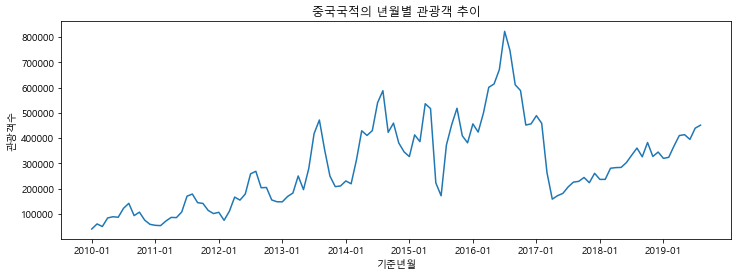

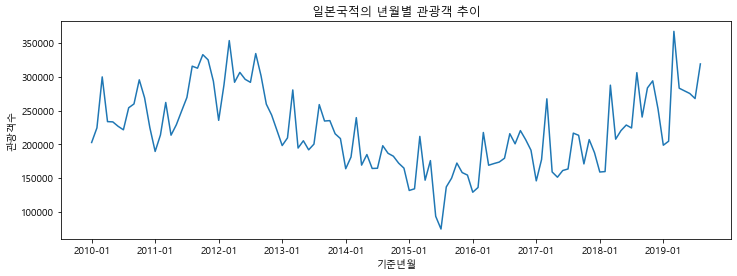

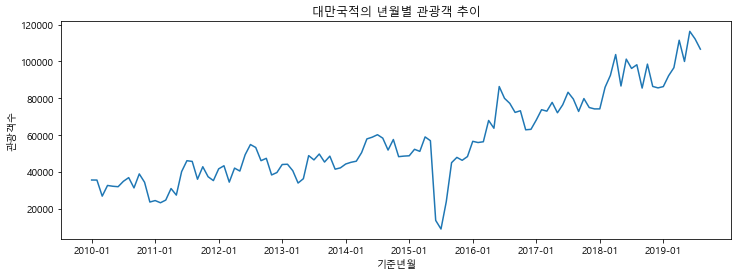

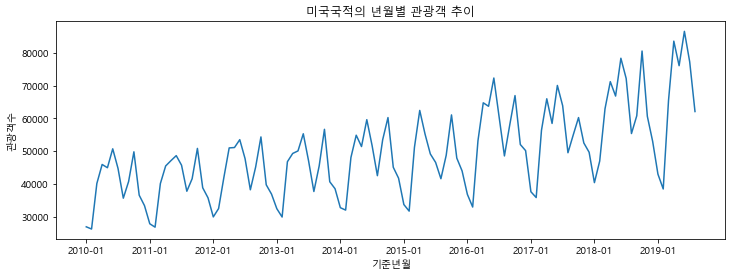

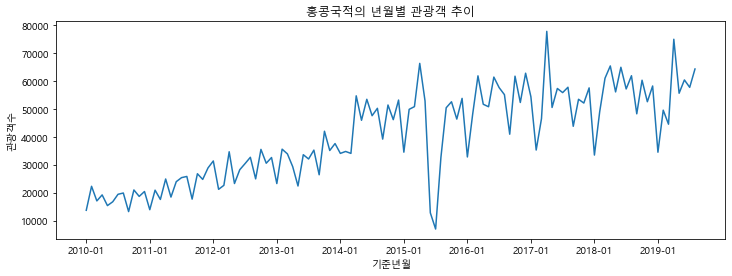

In [148]:

for i in contry_list:
    con = df[df['국적'] == i]
    plt.figure(figsize= (12,4))
    plt.plot(con['기준년월'], con['관광'])
    plt.title(f'{i}국적의 년월별 관광객 추이')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01']) # 리스트
    plt.show()

### 히트맵 그리기

In [153]:
df2 = df.copy()
df2

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [159]:
# df2의 기준년월 데이터에서 년도만 추출하여 '년도' 컬럼만들기
# df2의 기준년월 데이터에서 월만 추출하여 '월' 컬럼만들기
df['년도'] = df['기준년월'].str[0:4]
#df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str[5:7]
#df['기준년월'].str.slice(5,7)
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0,2019,08


In [184]:
# apply, lambda 사용
# df2['년도'] = df['기준년월'].apply(lambda x : x.split('-')[0])
# df2['월'] = df['기준년월'].apply(lambda x : x.split('-')[1])

# df2

In [185]:
df_filter = df[df['국적'] == '중국']

In [189]:
#년도 및 월별 관광 데이터의 평균 조회
ch_pivot = df_filter.pivot_table(values= '관광',index= '년도',columns='월')


In [187]:
import matplotlib.pyplot as plt
import seaborn as sns # 두가지 한 세트

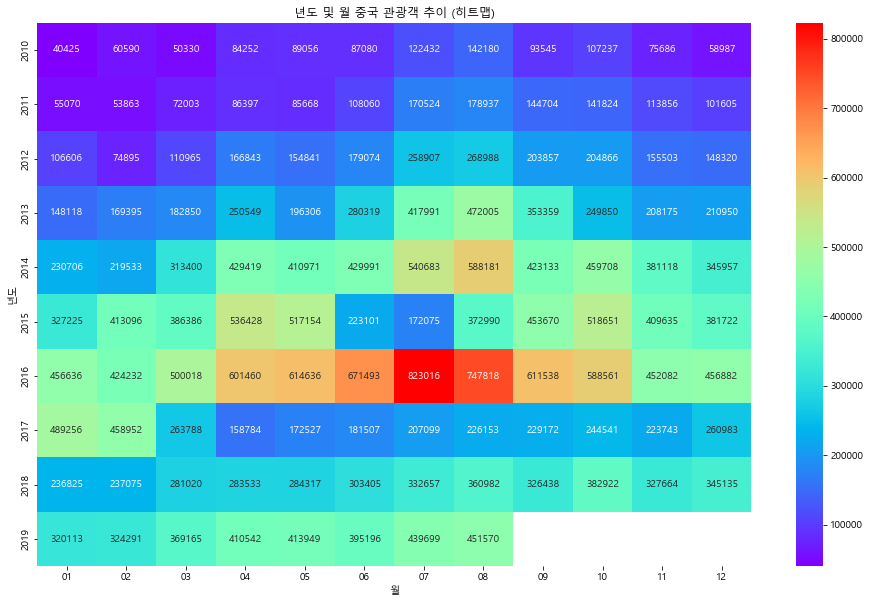

In [216]:
# 그래프 사이즈 설정하기
plt.figure(figsize= (16, 10))

# 히트맵 생성
sns.heatmap(ch_pivot, annot= True, fmt='.0f', cmap='rainbow')
plt.title('년도 및 월 중국 관광객 추이 (히트맵)')
plt.show()

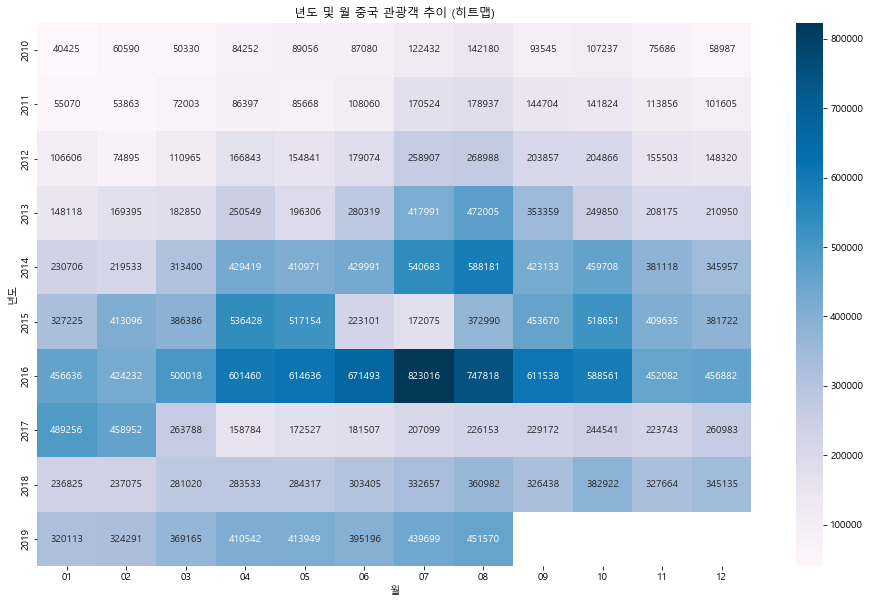

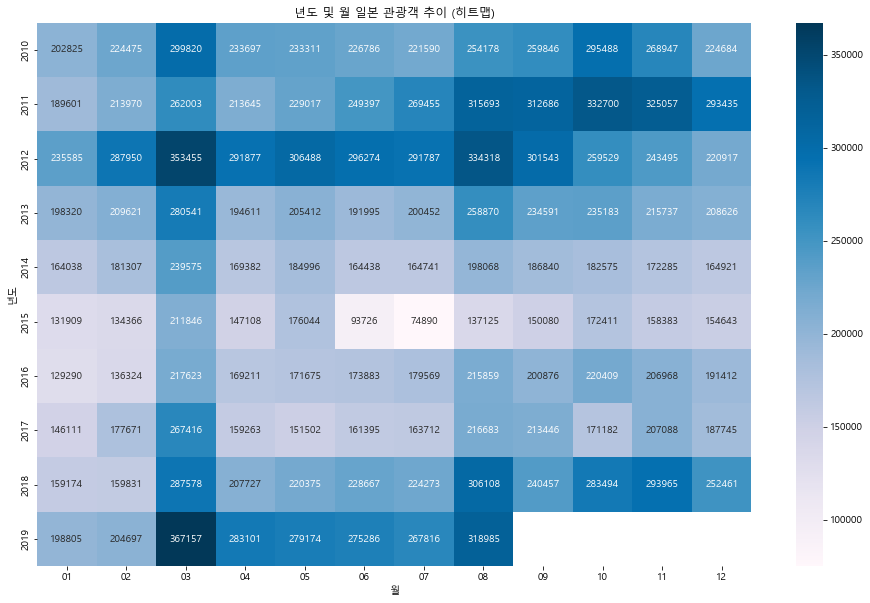

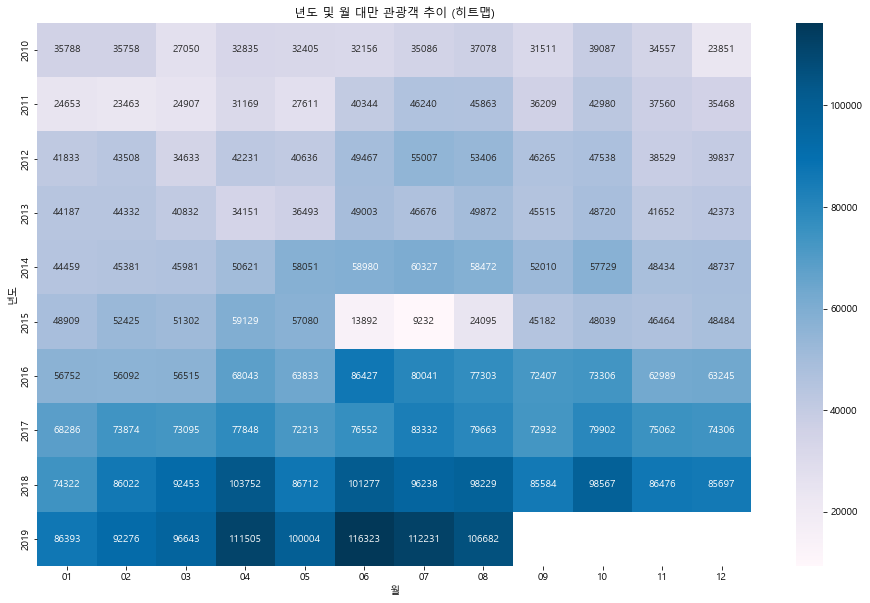

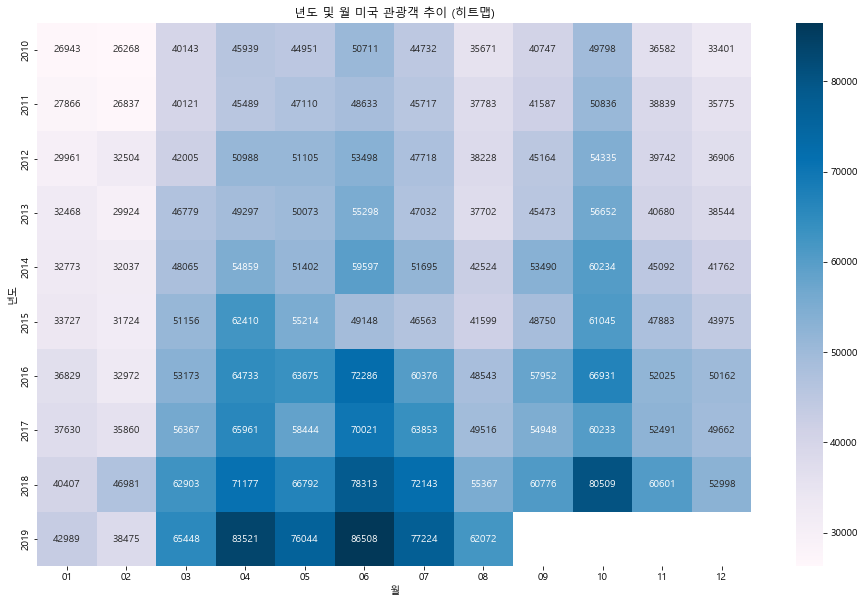

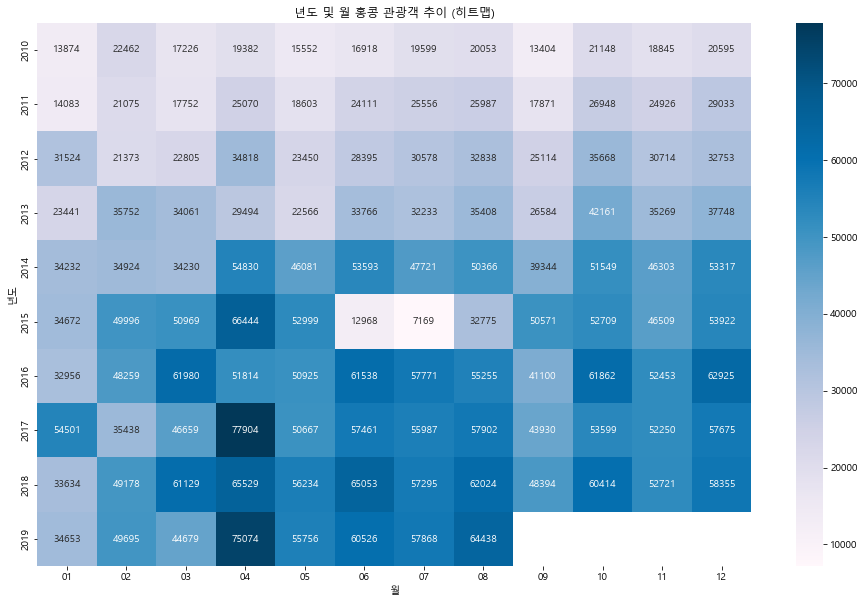

In [234]:
for i in contry_list:
    df_filter = df[df['국적'] == i]
    pivot = df_filter.pivot_table(values= '관광',index= '년도',columns='월')

    plt.figure(figsize= (16, 10))
    sns.heatmap(pivot, annot= True, fmt='.0f', cmap='PuBu')
    plt.title('년도 및 월 'f'{i} 관광객 추이 (히트맵)')
    plt.show()

In [ ]:
# 트렌드(전체적인 내용) : 2010년부터 2018년 까지 관광객수가 꾸준히 증가하고 있으며
#                         계절적인 영향을 많이 받는 것으로 보임 
#
# 이벤트(특이사항) : 아시아권 관광객수가 2015년 6월 ~ 8월 중에 급격히 감소했음
#                       - 원인분석 : 메르스 전염병에 의한 일시적 감소를 보였으며, 이후 증가됨.
#
#                    중국의 경우 2017년 3월부터 관광객수가 급격히 감소했음
#                       - 원인분석 : 우리나라 정부의 사드 미사일 기지 설치에 따른 보복으로
#                                    급격히 감소하였으며, 매우 미미하게 관광객이 증가하고 있음. 
#
# 계절(계절적 요인) : 2010년부터 4-8월 사이에 국내 관광객이 많으며,
#                     2016년 이후 봄, 여름에 매우 많은 관광객과, 가을에 매우 많은 관광객이 찾고있음.